# Pyber Challenge

### 4.3 Loading and Reading CSV files

### Merge the DataFrames

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_count = pyber_data_df.groupby(["type"]).count()['ride_id']
total_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_driver_sum =city_data_df.groupby(['type']).sum()['driver_count']
total_driver_sum


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_sum = pyber_data_df.groupby(['type']).sum()['fare']

total_fares_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fares_sum = pyber_data_df.groupby(['type']).mean()['fare']

avg_fares_sum

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
total_driver_fare_avg = total_fares_sum / total_driver_sum
total_driver_fare_avg


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df= pd.DataFrame({

           "Total Rides": total_rides_count,
          "Total Drivers": total_driver_sum,
          "Total Fares": total_fares_sum,
          "Average fare per ride" : avg_fares_sum,
          "Average fare per Driver": total_driver_fare_avg
         })
# .set_index('type')
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average fare per ride"] = pyber_summary_df["Average fare per ride"].map("${:,.2f}".format)
pyber_summary_df["Average fare per Driver"] = pyber_summary_df["Average fare per Driver"].map("${:,.2f}".format)

In [11]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [55]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_dates_sum = pyber_data_df.groupby(["date","type"]).sum()['fare']
total_dates_sum_df = pd.DataFrame(total_dates_sum)
total_dates_sum_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [56]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_dates_sum_df = total_dates_sum.reset_index()


In [59]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_dates_sum_df_pv = total_dates_sum_df.pivot(index= 'date', columns = 'type', values = 'fare')
total_dates_sum_df_pv 


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [62]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
total_dates_sum_df_pv_loc = total_dates_sum_df_pv['2019-01-01':'2019-04-29']
total_dates_sum_df_pv_loc 

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [63]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
total_dates_sum_df_pv_loc.index = pd.to_datetime(total_dates_sum_df_pv_loc.index)

In [64]:
# 7. Check that the datatype for the index is datetime using df.info()
total_dates_sum_df_pv_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [67]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_dates_sum_df_pv_loc_res = total_dates_sum_df_pv_loc.resample('w').sum()


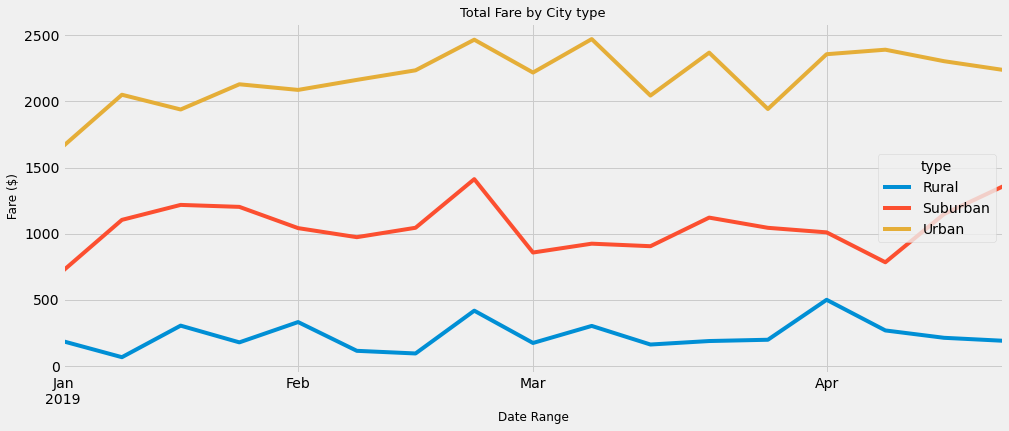

In [78]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

total_dates_sum_df_pv_loc_res.plot(figsize=(15, 6))
plt.title("Total Fare by City type", fontsize=13)
plt.ylabel(" Fare ($)", fontsize=12)
plt.xlabel("Date Range", fontsize=12)
# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")
# Show the plot
plt.show();